In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler


Percnetage Growth

In [3]:
df = pd.read_excel(r"C:\Users\jasonkan\Desktop\TEMG4950L SelfStudy ML\percentage growth.xlsx") 
df = df[4:] 
df.columns = df.iloc[0]
df = df[2:] 
df = df.drop(columns='Name') 
df = df.reset_index(drop=True)
df['Performance']= df['Performance'].fillna(method ='bfill')

df.head(10)
# plt.plot(df['Date'], df['Performance']) 
# plt.title("Invesco QQQ Trust Series 1 Percentage Growth", color='w') 
# plt.show() 

4,Date,Performance
0,28-Feb-1999,0.000000
1,31-Mar-1999,3.326057
2,30-Apr-1999,4.787336
3,31-May-1999,2.497534
4,30-Jun-1999,12.628134
5,31-Jul-1999,11.347199
6,31-Aug-1999,17.513675
7,30-Sep-1999,18.036995
8,31-Oct-1999,29.270589
9,30-Nov-1999,45.393350


Indexed Performance

In [4]:
df = pd.read_excel(r"C:\Users\jasonkan\Desktop\TEMG4950L SelfStudy ML\indexed performance.xlsx") 

df = df[4:] 
df.columns = df.iloc[0]
df = df[2:] 
df = df.drop(columns='Name') 
df = df.reset_index(drop=True)
df['Performance']= df['Performance'].fillna(method ='bfill')

df.tail(10)
# plt.plot(df['Date'], df['Performance']) 
# plt.title("Invesco QQQ Trust Series 1 Indexed Performance", color='w') 
# plt.show() 

4,Date,Performance
285,2022-11-30 00:00:00,667.145451
286,2022-12-31 00:00:00,607.048156
287,2023-01-31 00:00:00,671.680684
288,2023-02-28 00:00:00,669.100396
289,2023-03-31 00:00:00,732.731444
290,2023-04-30 00:00:00,736.418483
291,2023-05-31 00:00:00,793.179960
292,2023-06-30 00:00:00,844.901045
293,2023-07-31 00:00:00,877.180844
294,2023-08-31 00:00:00,863.840435


10K reinvested

In [5]:
df = pd.read_excel(r"C:\Users\jasonkan\Desktop\TEMG4950L SelfStudy ML\10k reinvested.xlsx") 
df = df[4:] 
df.columns = df.iloc[0]
df = df[2:] 
df = df.drop(columns='Name') 
df = df.reset_index(drop=True)
df['Performance']= df['Performance'].fillna(method ='bfill')

df.head(10)
# plt.plot(df['Date'], df['Performance']) 
# plt.title("Invesco QQQ Trust Series 1 Percentage Growth", color='w') 
# plt.show() 

4,Date,Performance
0,28-Feb-1999,10000.000000
1,31-Mar-1999,10332.605720
2,30-Apr-1999,10478.733635
3,31-May-1999,10249.753385
4,30-Jun-1999,11262.813355
5,31-Jul-1999,11134.719926
6,31-Aug-1999,11751.367530
7,30-Sep-1999,11803.699495
8,31-Oct-1999,12927.058922
9,30-Nov-1999,14539.335025


Price History
Since there are only three seperate table to parse, I manually determind the range of row to parse for each table.

     Exchange Date      Close       Net      %Chg       Open        Low  \
3300    2010-01-08  46.357516  0.378429  0.008230  45.849625  45.740079   
3301    2010-01-07  45.979087  0.029876  0.000650  46.008963  45.730121   
3302    2010-01-06  45.949211 -0.278842 -0.006032  46.198177  45.879501   
3303    2010-01-05  46.228053  0.000000  0.000000  46.188219  45.969128   
3304    2010-01-04  46.228053       NaN       NaN  46.128467  46.078674   

           High    Volume  Turnover - USD  
3300  46.357516  88886598             NaN  
3301  46.078674  77094032             NaN  
3302  46.357516  96033002             NaN  
3303  46.307722  62935591             NaN  
3304  46.292785  62822798             NaN  


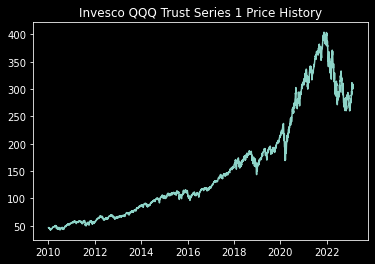

In [6]:
excel = pd.ExcelFile(r"C:\Users\jasonkan\Desktop\TEMG4950L SelfStudy ML\Price History_20230905_1027.xlsx")

# Parse the volume and # of day belong to each price range  
price_distribution = excel.parse(
    0, # Sheet index 
    index_col=None,  
    skiprows=range(9),
    nrows=9,
    usecols='A:E'
)
# print(price_distribution)

# Parse the 2010-2023 period summary stat like Max/Min Volume/Price and Price changed
# How to parse merge cell and specially formatted data
summary_stat = excel.parse(
    0, # Sheet index 
    index_col=None,  
    skiprows=range(22),
    nrows=4,
    usecols='A:P'
)
# print(summary_stat)

# Parse the History of Price
history = excel.parse(
    0, # Sheet index 
    index_col=None,  
    skiprows=range(29),
    nrows=3335-29,
    usecols='A:I'
)

# history = history[:-1]
print(history.tail(5))

# We fill the NaN value with the previous day's entry
history['Close']= history['Close'].fillna(method ='ffill')
plt.style.use('dark_background')

plt.plot(history['Exchange Date'], history['Close']) 
plt.title("Invesco QQQ Trust Series 1 Price History", color='w') 
plt.show() 

In [7]:
# The dataset was split 85% for the training set and 15% for the test set.


Dataset pre-processing

In [8]:
# Load libraries
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Expand the features: we want to turn the datatime feature into concrete "year", "month", and "day".
Afterward, we can drop the Date column.
For simplicity, we can also drop the turnover column since there is too many missing data that cannot be estimated resonably based on the given dataset.
Finally, we do the normalization

In [9]:

history["Exchange Date"] = pd.to_datetime(history["Exchange Date"])
history["year"] = history["Exchange Date"].dt.year
history["month"] = history["Exchange Date"].dt.month
history["date"] = history["Exchange Date"].dt.day

history = history.drop(["Exchange Date", "Turnover - USD"], axis=1)
# history_norm = history.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
# print(history_norm.head(5))

Prepare Training data
Defining Lookback and Future to be predicted for LSTM model

In [10]:
# dataset = history_norm.to_numpy()
# dataset = dataset.astype('float64')
# dataset = dataset.reshape(-1, 1)
dataset = history
print(dataset.shape)
# close = dataset['Close'] 

# # print(close) 
# close = close[::-1]
# print(close)
# dataset['Close'] = close

# # Get Close column as a Series
# close = dataset['Close'] 

# # Reverse the Series values 
# close = close[::-1]

# # Assign reversed Series back to DataFrame
# dataset['Close'] = close

print(dataset['Close'])



(3305, 10)
0       301.160000
1       303.300000
2       309.100000
3       306.750000
4       304.500000
           ...    
3300     46.357516
3301     45.979087
3302     45.949211
3303     46.228053
3304     46.228053
Name: Close, Length: 3305, dtype: float64


In [15]:
# lookback -> timestep
def create_dataset(dataset,look_back, future_predict):
    data_x, data_y = [],[] #data_x is data and data_y is label
    for i in range(dataset.shape[0]-look_back-future_predict): #we want if data be beyond len(sequendatasetce), the command will not continue
        data_x.append(dataset[i:(i+look_back)])
        data_y.append(dataset.iloc[i+look_back:i+look_back+future_predict]["Close"])
    return np.array(data_x) , np.array(data_y)

# # Credit:https://github.com/mehdisahraeei/Lstm_states_stocks/blob/master/lstm-projects/01-Lstm-forex-simple.ipynb
# # https://daniel820710.medium.com/%E5%88%A9%E7%94%A8keras%E5%BB%BA%E6%A7%8Blstm%E6%A8%A1%E5%9E%8B-%E4%BB%A5stock-prediction-%E7%82%BA%E4%BE%8B-1-67456e0a0b



Split dataset and fomalize dataset for model

In [18]:
# Split scaled data into train and test
train, test = train_test_split(dataset, test_size=0.1) 

# Split test into validation and test 
train, val = train_test_split(train, test_size=0.1) 

# Calculate sizes
train_size = len(train)
val_size = len(val) 
test_size = len(test)

look_back = 20
future = 1

train_x , train_y = create_dataset(train, look_back, future)
val_x , val_y = create_dataset(val, look_back, future)
test_x , test_y = create_dataset(test, look_back, future)

# # train_y = train_y.reshape(-1, 1)
# print(train_x.shape , train_y.shape)
# print(val_x.shape , val_y.shape)

# print(test_x.shape , test_y.shape)
# print(train_x[:5])



# The input data format expected by LSTM models must be three-dimensional.

# Specifically:

# The first dimension corresponds to the number of samples/sequences.

# The second dimension represents the number of timesteps or lookbacks in each sequence.

# The third dimension contains the number of features at each timestep. (only Closing price so = 1)

# train_x = np.reshape(train_x,(train_x.shape[0],train_x.shape[1],1))
# val_x = np.reshape(val_x,(val_x.shape[0],val_x.shape[1],1))
# test_x = np.reshape(test_x,(test_x.shape[0],test_x.shape[1],1))
print(train_x[:10])



[[[ 1.18480000e+02 -1.23000000e+00 -1.02748308e-02 ...  2.01600000e+03
    1.20000000e+01  3.00000000e+01]
  [ 1.26290000e+02  4.60000000e-01  3.65572598e-03 ...  2.01700000e+03
    2.00000000e+00  7.00000000e+00]
  [ 1.79700000e+02 -1.60000000e-01 -8.89580785e-04 ...  2.01800000e+03
    8.00000000e+00  2.00000000e+01]
  ...
  [ 1.86010000e+02  3.70000000e+00  2.02951017e-02 ...  2.02000000e+03
    4.00000000e+00  2.00000000e+00]
  [ 4.53018989e+01 -9.95865000e-03 -2.19780220e-04 ...  2.01000000e+03
    6.00000000e+00  1.40000000e+01]
  [ 8.82300000e+01  1.43000000e+00  1.64746544e-02 ...  2.01400000e+03
    5.00000000e+00  1.20000000e+01]]

 [[ 1.26290000e+02  4.60000000e-01  3.65572598e-03 ...  2.01700000e+03
    2.00000000e+00  7.00000000e+00]
  [ 1.79700000e+02 -1.60000000e-01 -8.89580785e-04 ...  2.01800000e+03
    8.00000000e+00  2.00000000e+01]
  [ 1.72890000e+02  1.27000000e+00  7.40006992e-03 ...  2.01900000e+03
    2.00000000e+00  2.20000000e+01]
  ...
  [ 4.53018989e+01 -9.9

In [17]:
print(test_x.shape)
print(test_x[:5])

(310, 20, 10)
[[[ 1.74730000e+02  3.56000000e+00  2.07980370e-02  1.71860000e+02
    1.71850000e+02  1.74850000e+02  3.05184080e+07  2.01900000e+03
    3.00000000e+00  1.10000000e+01]
  [ 1.75690000e+02  9.60000000e-01  5.49419104e-03  1.75170000e+02
    1.74771500e+02  1.76140000e+02  3.39535000e+07  2.01900000e+03
    3.00000000e+00  1.20000000e+01]
  [ 6.21021414e+01  2.29048950e-01  3.70191534e-03  6.18830511e+01
    6.15444570e+01  6.23511077e+01  6.51705030e+07  2.01200000e+03
    6.00000000e+00  1.40000000e+01]
  [ 5.60572408e+01 -1.99173000e-01 -3.54044964e-03  5.59476957e+01
    5.56290189e+01  5.63560004e+01  7.36217600e+07  2.01100000e+03
    3.00000000e+00  1.40000000e+01]
  [ 1.07420000e+02 -6.60000000e-01 -6.10658771e-03  1.07580000e+02
    1.06840000e+02  1.07660000e+02  2.11679030e+07  2.01600000e+03
    7.00000000e+00  5.00000000e+00]
  [ 9.58400000e+01  5.70000000e-01  5.98299570e-03  9.57000000e+01
    9.55350000e+01  9.60550000e+01  1.95790410e+07  2.01400000e+03
  

In [13]:
def load_data_split_train_test(data, seq_len, normalise_window):
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    
    if normalise_window:
        result = normalise_windows(result)

    result = np.array(result)

    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    y_train = train[:, -1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

    return [x_train, y_train, x_test, y_test]
# Normalize function
def normalise_windows(window_data):
    normalised_data = []
    for window in window_data:
        normalised_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalised_data.append(normalised_window)
    return normalised_data

In [14]:
train_x, train_y, test_x, test_y = load_data_split_train_test(dataset['Close'], 20, True)

# LSTM Model
batch_size = 1
nb_epoch = 5
seq_len = 20
loss='mean_squared_error'
optimizer = 'rmsprop'
activation = 'linear'
input_dim = 10
output_dim = 30
# Create model
model = Sequential()

# Add LSTM layer 
model.add(LSTM(50, input_length=train_x.shape[1], input_dim=train_x.shape[2]))  

# Add output layer
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error',
              optimizer='adam')
# batch_size = 128
# # Fit model 
# model.fit(train_x, train_y, 
#           epochs=5, 
#           batch_size=batch_size,
#           validation_data=(test_x, test_y))

# # Make predictions
# y_pred = model.predict(test_x)
# print(y_pred[:5])
# predictions = model.predict(test_x)


# start = time.time()
# model.compile(loss=loss, optimizer=optimizer)
# print ('compilation time : ', time.time() - start)

#Train the model
model.fit(
    train_x,
    train_y,
    batch_size=batch_size,
    epochs=nb_epoch,
    validation_split=0.05)

testPredict = model.predict(test_x, batch_size=batch_size)
score = model.evaluate(test_x, test_y, batch_size=batch_size, verbose=0)


KeyError: 0

Prediction and Evaluation

3/3 [==============================] - 0s 5ms/step
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Mean squared error (MSE) nan
Root Mean squared error (RMSE) nan


c:\Users\jasonkan\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
c:\Users\jasonkan\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


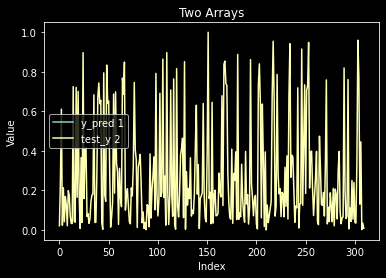

In [ ]:


y_pred = model.predict(test_x,  batch_size=batch_size)
print(y_pred[:5])

score = model.evaluate(test_x, test_y,  batch_size=batch_size, verbose=0)
TM_MSE = score
TM_RMSE = math.sqrt(score)
# print(test_y[:5])
print ('Mean squared error (MSE)', TM_MSE)
print ('Root Mean squared error (RMSE)', TM_RMSE)
# y_pred = y_pred.dropna() # drop rows with any NaN
# y_pred = y_pred[np.isfinite(y_pred).all(axis=1)] # drop rows with non-finite values
# test_y = test_y.dropna() # drop rows with any NaN
# test_y = test_y[np.isfinite(test_y).all(axis=1)] # drop rows with non-finite values
scaler = MinMaxScaler()
y_pred = scaler.fit_transform(y_pred)
test_y = scaler.fit_transform(test_y)
plt.plot(y_pred, label='y_pred 1') 

# Plot the second array  
plt.plot(test_y, label='test_y 2')

# Add labels and display
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Two Arrays')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,  accuracy_score, precision_score, f1_score
from sklearn.ensemble import ExtraTreesClassifier

mae = mean_absolute_error(test_y, y_pred)
mse = mean_squared_error(test_y, y_pred)

accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)

f1 = f1_score(test_y, y_pred)


model = ExtraTreesClassifier()
model.fit(train_x, train_y)
feat_importances = pd.Series(model.feature_importances_, index=train_x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 50)                12200     
                                                                 
 dense_10 (Dense)            (None, 1)                 51        
                                                                 
Total params: 12,251
Trainable params: 12,251
Non-trainable params: 0
_________________________________________________________________


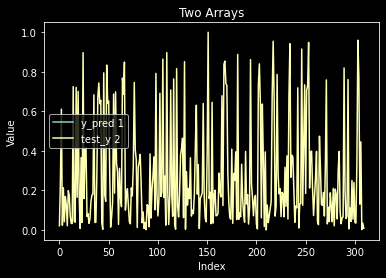

In [ ]:

model.summary()
# test_results = model.evaluate(test_x, test_y)
# print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')
plt.plot(y_pred, label='y_pred 1') 

# Plot the second array  
plt.plot(test_y, label='test_y 2')

# Add labels and display
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Two Arrays')
plt.legend()
plt.show()
# print("y pred", y_pred[:10], "\n")
# print("   ")
# print("test", test_y[:10])

# # Evaluate performance
# mae = mean_absolute_error(test_y, y_pred)
# mse = mean_squared_error(test_y, y_pred)

# # Print metrics
# print('MAE:', mae) 
# print('MSE:', mse)
# predict_train = model.predict(train_x)
# predict_test = model.predict(test_x)
# print('predicted y(train):', np.reshape(predict_train[:5],-1))
# print('real y(train):', train_y[:5])

In [ ]:
predict_train = scaler.inverse_transform(predict_train)
trainy = scaler.inverse_transform([train_y])

predict_test = scaler.inverse_transform(predict_test)
testy = scaler.inverse_transform([test_y])

ValueError: Found array with dim 3. Estimator expected <= 2.

In [ ]:
Answer1 = pd.DataFrame({
    "Predicted": predict_train.ravel(),
    "real": trainy.ravel()
}) 
# Answer1.head()
Answer1.plot(title="outcome", figsize=(100,20));


ValueError: All arrays must be of the same length